In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

# MovieLens

## Load Data

In [33]:
#read MovieLens 100k
ml_100k = pd.read_csv('ml-100k/u.data', sep='\t', header=None, names=['User', 'Movie', 'Rating', 'Timestamp'])

#read MovieLens 1m
ml_1m = pd.read_csv('ml-1m/ml-1M_ratings.dat', sep='::', engine='python', header=None, names=['User', 'Movie', 'Rating', 'Timestamp'])

## Compare ML 100k and 1M

In [34]:
import pandas as pd

def MovieLens_features(df, dataset_name):
    """
    Calculate various statistics and features from a MovieLens DataFrame.

    Parameters:
    - df (pd.DataFrame): MovieLens DataFrame with columns 'User', 'Movie', 'Rating', 'Timestamp'.
    - dataset_name (String): Name of the dataset,  which will later be displayed.

    Returns:
    - pd.DataFrame: One-row DataFrame containing calculated features.
    """
    # Number of ratings
    n_ratings = len(df)

    # Number of unique users and movies
    n_user = len(df['User'].unique())
    n_movie = len(df['Movie'].unique())

    # Average number of ratings per user and movie
    avr_ratings_user = n_ratings / n_user
    avr_ratings_movie = n_ratings / n_movie

    # Sparcity
    sparc = n_ratings / (n_user * n_movie)

    # Time of the first and latest rating
    time_first = pd.to_datetime(df['Timestamp'].min(), unit='s')
    time_last = pd.to_datetime(df['Timestamp'].max(), unit='s')

    # Average rating
    rating_avr = df['Rating'].mean()

    # Percentage of ratings for each category
    perc_5 = len(df[df['Rating'].isin([5, 4.5])]) / n_ratings
    perc_4 = len(df[df['Rating'].isin([4, 3.5])]) / n_ratings
    perc_3 = len(df[df['Rating'].isin([3, 2.5])]) / n_ratings
    perc_2 = len(df[df['Rating'].isin([2, 1.5])]) / n_ratings
    perc_1 = len(df[df['Rating'].isin([1, 0.5])]) / n_ratings

    # Create a one-row DataFrame with calculated features
    features_df = pd.DataFrame({
        'Dataset': [dataset_name],
        'Number_of_Ratings': [n_ratings],
        'Number_of_Unique_Users': [n_user],
        'Number_of_Unique_Movies': [n_movie],
        'Average_Ratings_Per_User': [avr_ratings_user],
        'Average_Ratings_Per_Movie': [avr_ratings_movie],
        'Sparcity': [sparc],
        'Time_of_First_Rating': [time_first],
        'Time_of_Latest_Rating': [time_last],
        'Average_Rating': [rating_avr],
        'Percentage_of_5_Star_Ratings': [perc_5],
        'Percentage_of_4_Star_Ratings': [perc_4],
        'Percentage_of_3_Star_Ratings': [perc_3],
        'Percentage_of_2_Star_Ratings': [perc_2],
        'Percentage_of_1_Star_Ratings': [perc_1],
    })

    return features_df

In [35]:
compare = pd.DataFrame()
compare = pd.concat([compare, MovieLens_features(ml_100k, 'MovieLens 100k')])
compare = pd.concat([compare, MovieLens_features(ml_1m, 'MovieLens 1M')])

compare

,Dataset,Number_of_Ratings,Number_of_Unique_Users,Number_of_Unique_Movies,Average_Ratings_Per_User,Average_Ratings_Per_Movie,Sparcity,Time_of_First_Rating,Time_of_Latest_Rating,Average_Rating,Percentage_of_5_Star_Ratings,Percentage_of_4_Star_Ratings,Percentage_of_3_Star_Ratings,Percentage_of_2_Star_Ratings,Percentage_of_1_Star_Ratings
0,MovieLens 100k,100000,943,1682,106.044539,59.453032,0.063047,1997-09-20 03:05:10,1998-04-22 23:10:38,3.529860,0.212010,0.341740,0.271450,0.113700,0.061100
0,MovieLens 1M,1000209,6040,3706,165.597517,269.889099,0.044684,2000-04-25 23:05:32,2003-02-28 17:49:50,3.581564,0.226263,0.348898,0.261142,0.107535,0.056162


The dataframe compares three versions of the MovieLens dataset. The first version contains 100,000 ratings surveyed between September 1997 and April 1998. The second version contains 1 million ratings surveyed from April 2000 to February 2003. The last version contains 25 million ratings surveyed from 1995 to 2019.

There is little difference in the rating distribution between all three datasets. The only notable difference is that the version with 25 million ratings has ratings with half stars like 0.5, 1.5, and so on, while the other two only include integer values from 1 to 5.

While less sparse, the 100k version has a lot fewer ratings per user and per movie than the other two. However, averages should be taken with a grain of salt in this context, as they are sensitive towards outliers.

The 25M version should probably not be used with a model that does not factor in time, as the ratings are allocated over 24 years. In this timeframe, technology and, therefore, audio and video quality improved a lot, and therefore the same rating in 1995 and 2019 should have different implications.

In [36]:
ml_100k.Rating.unique()

array([3, 1, 2, 4, 5], dtype=int64)

Text(0.5, 1.0, 'Rating Distribution Comparison')

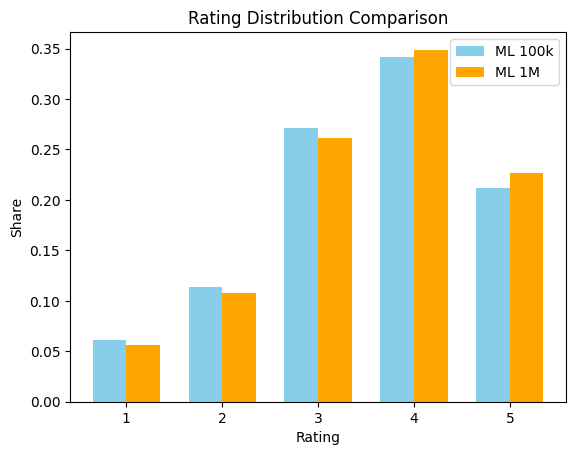

In [37]:
rating_share_1 = ml_100k['Rating'].value_counts(normalize=True).sort_index()
rating_share_2 = ml_1m['Rating'].value_counts(normalize=True).sort_index()

bar_width = 0.35
bar_pos_1 = rating_share_1.index - bar_width/2
bar_pos_2 = rating_share_2.index + bar_width/2

plt.bar(bar_pos_1, rating_share_1.values, width=bar_width, label='ML 100k', color='skyblue')
plt.bar(bar_pos_2, rating_share_2.values, width=bar_width, label='ML 1M', color='orange')
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Share')
plt.title('Rating Distribution Comparison')

In [38]:
# Create an Altair bar chart

# Create a new DataFrame with the count of occurrences for each user
user_counts = ml_1m['User'].value_counts().reset_index()
user_counts.columns = ['User', 'Count']

# Create an Altair histogram with bins
chart_user = alt.Chart(user_counts).mark_bar().encode(
    alt.X('Count:Q', bin=alt.Bin(step=2), title='Number of Ratings'),
    alt.Y('count():Q', title='Number of Users'),
    tooltip=['Count:Q', 'count()']
).properties(
    width=600,
    height=400,
    title='Distribution of the Number of Ratings per User'
)

chart_user

alt.Chart(...)

In [39]:
user_counts.describe()

,User,Count
count,6040.000000,6040.000000
mean,3020.500000,165.597517
std,1743.742145,192.747029
min,1.000000,20.000000
25%,1510.750000,44.000000
50%,3020.500000,96.000000
75%,4530.250000,208.000000
max,6040.000000,2314.000000


## Add user and item information

In [40]:
column_names_items = [
    'Movie', 'Title', 'ReleaseDate', 'Empty1', 'IMDbURL',
    'Genre_unknown', 'Genre_Action', 'Genre_Adventure', 'Genre_Annimation', 'Genre_Children', 'Genre_Comedy', 'Genre_Crime', 
    'Genre_Documentary', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Musical', 'Genre_Mystery',
    'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller', 'Genre_War', 'Genre_Western'
]

# Read the data into a pandas DataFrame
ml_100k_genres = pd.read_csv('ml-100k/u.item', sep='|', names=column_names_items, encoding='latin1')

#create a release date timespamp
ml_100k_genres['ReleaseDate'] = pd.to_datetime(ml_100k_genres['ReleaseDate'], errors='coerce')

# drop columns without information
ml_100k_genres = ml_100k_genres.drop(columns=['Title', 'Empty1', 'IMDbURL'])

In [41]:
def get_genres(row):
    genres = [col.replace('Genre_', '') for col in column_names_items[5:] if row[col] == 1]
    return '|'.join(genres)


ml_100k_genres['Genre'] = ml_100k_genres.apply(get_genres, axis=1)

ml_100k_genres = ml_100k_genres.drop(columns=['Genre_unknown', 'Genre_Action', 'Genre_Adventure', 'Genre_Annimation', 'Genre_Children', 'Genre_Comedy', 'Genre_Crime', 
    'Genre_Documentary', 'Genre_Drama', 'Genre_Fantasy', 'Genre_Film-Noir', 'Genre_Horror', 'Genre_Musical', 'Genre_Mystery',
    'Genre_Romance', 'Genre_Sci-Fi', 'Genre_Thriller', 'Genre_War', 'Genre_Western'])

In [42]:
# 1M
ml_1M_genres = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python', header=None, names=['Movie', 'Titel', 'Genre'], encoding='latin1')
ml_1M_genres['Release_Year'] = ml_1M_genres['Titel'].str.extract(r'\((\d{4})\)')
ml_1M_genres['Release_Year'] = pd.to_numeric(ml_1M_genres['Release_Year'], errors='coerce')
ml_1M_genres = ml_1M_genres.drop(columns='Titel')

# categorize release year
# Define the bins for categorization
bins = [0, 1950, 1971, 1981, 1991, 2001]
labels = ['1919-1950', '1951-1970', '1971-1980', '1981-1990', '1991-2000']

# Categorize the 'Year' column into the specified groups
ml_1M_genres['Release_Year'] = pd.cut(ml_1M_genres['Release_Year'], bins=bins, labels=labels, right=False)

ml_1M_genres.Release_Year.unique()

['1991-2000', '1971-1980', '1981-1990', '1951-1970', '1919-1950']
Categories (5, object): ['1919-1950' < '1951-1970' < '1971-1980' < '1981-1990' < '1991-2000']

In [43]:
chart_movie_year = alt.Chart(ml_1M_genres).mark_bar().encode(
    x=alt.X('Release_Year:N', title='Release Year', axis=alt.Axis(labelAngle=-0)),
    y=alt.Y('count():Q', title='Count'),
    tooltip=[alt.Tooltip('count()', title='Count')]
).properties(
    width=600,
    height=400,
    title='Distribution of Movie Release Years'
)

chart_movie_year

alt.Chart(...)

In [44]:
column_names_user = [
    'User', 'Age', 'Gender', 'Occupation', 'ZIPCode'
]

# Read the data into a pandas DataFrame
ml_100k_user = pd.read_csv('ml-100k/u.user', sep='|', names=column_names_user, encoding='latin1')

# drop no longer needed column
ml_100k_user = ml_100k_user.drop(columns=['ZIPCode'])

We have 943 different users and 795 different ZIP Codes, as this would add little value while creating a lot of additional columns, we will ignore the ZIP code and drop it from our dataset.

In [45]:
# 1M
ml_1M_user = pd.read_csv('ml-1m/users.dat', sep='::', engine='python', header=None, names=['User', 'Gender', 'Age', 'Occupation', 'ZIPCode'], encoding='latin1')

# check whether ZIP Code is a usefull feature
print(f'Number of different ZIP codes in the dataset: {len(ml_1M_user.ZIPCode.unique())}')
print(f'Number of different users in the dataset: {len(ml_1M_user.User.unique())}')
ml_1M_user.drop(columns='ZIPCode', inplace=True)

#check gender distribution
print('*'*20)
print(f"Number of male users: {len(ml_1M_user[ml_1M_user['Gender']=='M'])}")
print(f"Number of female users: {len(ml_1M_user[ml_1M_user['Gender']=='F'])}")

Number of different ZIP codes in the dataset: 3439
Number of different users in the dataset: 6040
********************
Number of male users: 4331
Number of female users: 1709


In [46]:
user_age = ml_1M_user['Age'].value_counts().reset_index()
user_age.columns = ['Age', 'Count']

user_age

,Age,Count
0,25,2096
1,35,1193
2,18,1103
3,45,550
4,50,496
5,56,380
6,1,222


In [47]:
user_oc = ml_1M_user['Occupation'].value_counts().reset_index()
user_oc.columns = ['Occupation', 'Count']

user_oc

,Occupation,Count
0,4,759
1,0,711
2,7,679
3,1,528
4,17,502
5,12,388
6,14,302
7,20,281
8,2,267
9,16,241


### Join Datasets

In [48]:
ml_100k_full = pd.merge(ml_100k, ml_100k_user, on = 'User', how = 'left')
ml_100k_full = pd.merge(ml_100k_full, ml_100k_genres, on = 'Movie', how = 'left')

ml_1M_full = pd.merge(ml_1m, ml_1M_user, on = 'User', how = 'left')
ml_1M_full = pd.merge(ml_1M_full, ml_1M_genres, on = 'Movie', how = 'left')

In [49]:
#save to  csv
ml_100k_full.to_csv('ml_100k_full.csv', index=False)
ml_1M_full.to_csv('ml_1M_full.csv', index=False)